In [47]:
import os
os.chdir('/home/jovyan/work/src')
import reading
import numpy as np
import math
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
df = reading.read_lightcurve_vast('../support/vast-1.0rc84/out00515.dat')

In [37]:
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 9 columns):
JD         791 non-null object
Vrel       791 non-null float64
err        791 non-null float64
X          791 non-null float64
Y          791 non-null float64
unknown    791 non-null float64
file       791 non-null object
JD2        791 non-null float64
JD3        791 non-null float64
dtypes: float64(7), object(2)
memory usage: 55.7+ KB
None


,JD,Vrel,err,X,Y,unknown,file,JD2,JD3
0,2457236.66302,14.997417,0.053129,692.57800,1330.71265,5.7,../../inputfiles/WWCrA2015/fits/WWCrA#30V_0001...,2.457237e+06,0.00000
1,2457236.66667,15.072714,0.053628,698.23981,1327.46545,5.6,../../inputfiles/WWCrA2015/fits/WWCrA#30V_0001...,2.457237e+06,0.00365
2,2457236.67037,15.259870,0.072067,697.37201,1326.92151,6.0,../../inputfiles/WWCrA2015/fits/WWCrA#30V_0001...,2.457237e+06,0.00735
3,2457236.67396,15.115338,0.053727,691.77008,1327.31042,5.4,../../inputfiles/WWCrA2015/fits/WWCrA#30V_0001...,2.457237e+06,0.01094
4,2457236.67744,15.105314,0.060107,687.74213,1327.05286,5.8,../../inputfiles/WWCrA2015/fits/WWCrA#30V_0001...,2.457237e+06,0.01442


0.0 4.617689999992399


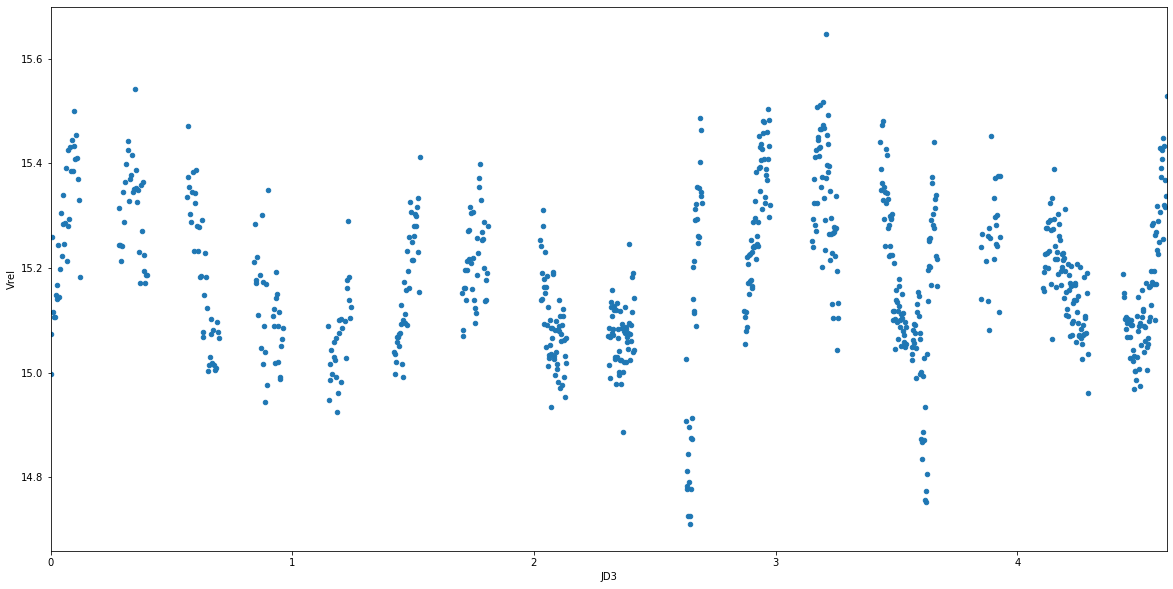

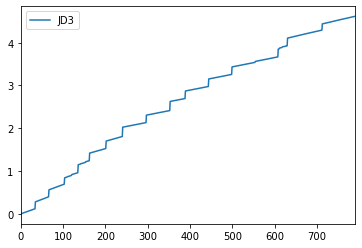

In [91]:
period = 0.23860

jds = df['JD'].astype(float).to_numpy()
jds_norm_orig = np.subtract(jds, jds.min())
jds_norm = np.diff(jds_norm_orig)
jds_norm = np.mod(jds_norm, period)
jds_norm = np.concatenate(([jds_norm_orig[0]],jds_norm))
jds_norm = np.cumsum(jds_norm)
minimum, maximum = np.min(jds_norm),np.max(jds_norm)
print(minimum, maximum)
df['JD3'] = jds_norm
df.plot(x='JD3', y='Vrel', kind='scatter', logx=False, figsize=(20,10), use_index=False, xlim=(minimum, maximum))
df.plot(y='JD3')